In [4]:
import pyfolio as pf

from backtester import Backtest
from backtester.strategy import Strategy, StrategyLeg
from backtester.enums import Type, Direction, Stock
from backtester.datahandler import HistoricalOptionsData, TiingoData
# Cleaned up data
options_data = HistoricalOptionsData(
        "/Users/lambdaclass/options_backtester_copy/backtester/examples/options_data_clean_v2.h5",
        key="/SPX",
        where='quotedate >= "2012-01-01" & quotedate <= "2014-01-01"')


schema = options_data.schema


options_schema = options_data.schema
put_otm = Strategy(options_schema)

leg_1 = StrategyLeg("leg_1", options_schema, option_type=Type.PUT, direction=Direction.BUY)
leg_1.entry_filter = (options_schema.underlying == "SPX") & (options_schema.dte >= 60)
leg_1.exit_filter = (options_schema.dte <= 30)

leg_2 = StrategyLeg("leg_2", options_schema, option_type=Type.CALL, direction=Direction.BUY)
leg_2.entry_filter = (options_schema.underlying == "SPX") & (options_schema.dte >= 60)
leg_2.exit_filter = (options_schema.dte <= 30)
put_otm.add_legs([leg_1, leg_2])
options_data.columns = [
    'underlying', 'underlying_last', 'optionroot', 'type', 'expiration', 'quotedate', 'strike', 'last', 'bid', 'ask',
        'volume', 'openinterest', 'impliedvol', 'delta', 'gamma', 'theta', 'vega', 'optionalias', 'dte'
    ]
options_data.quotedate = options_data.quotedate.dt.tz_localize(None)
options_data._data.quotedate = options_data._data.quotedate.dt.tz_localize(None)

allocation = {'cash': 0, 'stocks': 97, 'options': 3}

bt = Backtest(allocation=allocation)

    #asset_data = HistoricalAssetData('/Users/lambdaclass/options_backtester_copy/data/ivy_5assets.csv')
asset_data = TiingoData('/Users/lambdaclass/options_backtester_copy/data/ivy_5assets.csv')
asset_data._data.date = asset_data._data.date.dt.tz_localize(None)

asset_data.start_date = min(asset_data._data.date)
asset_data.end_date = max(asset_data._data.date)
VTI = Stock("VTI", 0.2)
VEU = Stock("VEU", 0.2)
BND = Stock("BND", 0.2)
VNQ = Stock("VNQ", 0.2)
DBC = Stock("DBC", 0.2)
bt.stocks = [VTI, VEU, BND, VNQ, DBC]
asset_data._data = asset_data._data.query('date >= "2012-01-01" & date <= "2014-01-01"')
bt.options_data = options_data
bt._options_strategy = put_otm
bt.stocks_data = asset_data
bt.stocks_data.start_date = min(bt.stocks_data['date'])
bt.stocks_data.end_date = max(bt.stocks_data['date'])

bt.current_cash = 1_000_000
bt.run(rebalance_freq=1)
bt.balance


0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:08


,total capital,cash,VTI,VEU,BND,VNQ,DBC,options qty,calls capital,puts capital,stocks qty,options capital,stocks capital,% change,accumulated return
2012-01-02,1.000000e+06,1000000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000e+00,NaN,NaN
2012-01-03,9.978700e+05,2233.455073,193990.075633,193976.304225,193986.878802,193966.992283,193976.293985,6.0,25740.0,0.0,24257.0,25740.0,9.698965e+05,-0.002130,0.997870
2012-01-04,9.949656e+05,2233.455073,194079.321182,193451.915101,194080.052134,190650.750322,195450.064670,6.0,25020.0,0.0,24257.0,25020.0,9.677121e+05,-0.002911,0.994966
2012-01-05,9.927494e+05,2233.455073,194942.028158,191259.015126,194010.172135,192441.520981,192783.241526,6.0,25080.0,0.0,24257.0,25080.0,9.654360e+05,-0.002227,0.992749
2012-01-06,9.887005e+05,2233.455073,194495.800412,188827.756460,194126.638801,191811.435009,193625.396202,6.0,23580.0,0.0,24257.0,23580.0,9.628870e+05,-0.004079,0.988700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-23,1.331694e+06,2059.477942,259726.002177,257396.446444,254976.455889,257136.218232,256859.352660,7.0,43540.0,0.0,28406.0,43540.0,1.286094e+06,0.005449,1.331694
2013-12-24,1.336095e+06,2059.477942,260437.655255,257861.901140,254442.393001,257363.391128,257660.161242,7.0,46270.0,0.0,28406.0,46270.0,1.287766e+06,0.003305,1.336095
2013-12-26,1.342131e+06,2059.477942,261669.362505,258947.962095,254061.063076,257562.280921,258060.565534,7.0,49770.0,0.0,28406.0,49770.0,1.290301e+06,0.004517,1.342131
2013-12-27,1.344328e+06,2059.477942,261505.134872,259982.305862,254061.063076,258119.172339,258761.273042,7.0,49840.0,0.0,28406.0,49840.0,1.292429e+06,0.001637,1.344328


Start date,2012-01-03
End date,2013-12-30
Total months,23
,Backtest
Annual return,16.1%
Cumulative returns,34.5%
Annual volatility,14.5%
Sharpe ratio,1.10
Calmar ratio,1.49
Stability,0.86
Max drawdown,-10.8%


/usr/local/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,10.79,2013-05-21,2013-06-24,2013-10-18,109
1,9.85,2012-04-02,2012-06-04,2012-08-09,94
2,8.15,2013-10-29,2013-12-13,NaT,NaN
3,7.68,2012-09-14,2012-11-15,2013-01-02,79
4,3.27,2013-04-11,2013-04-18,2013-04-29,13


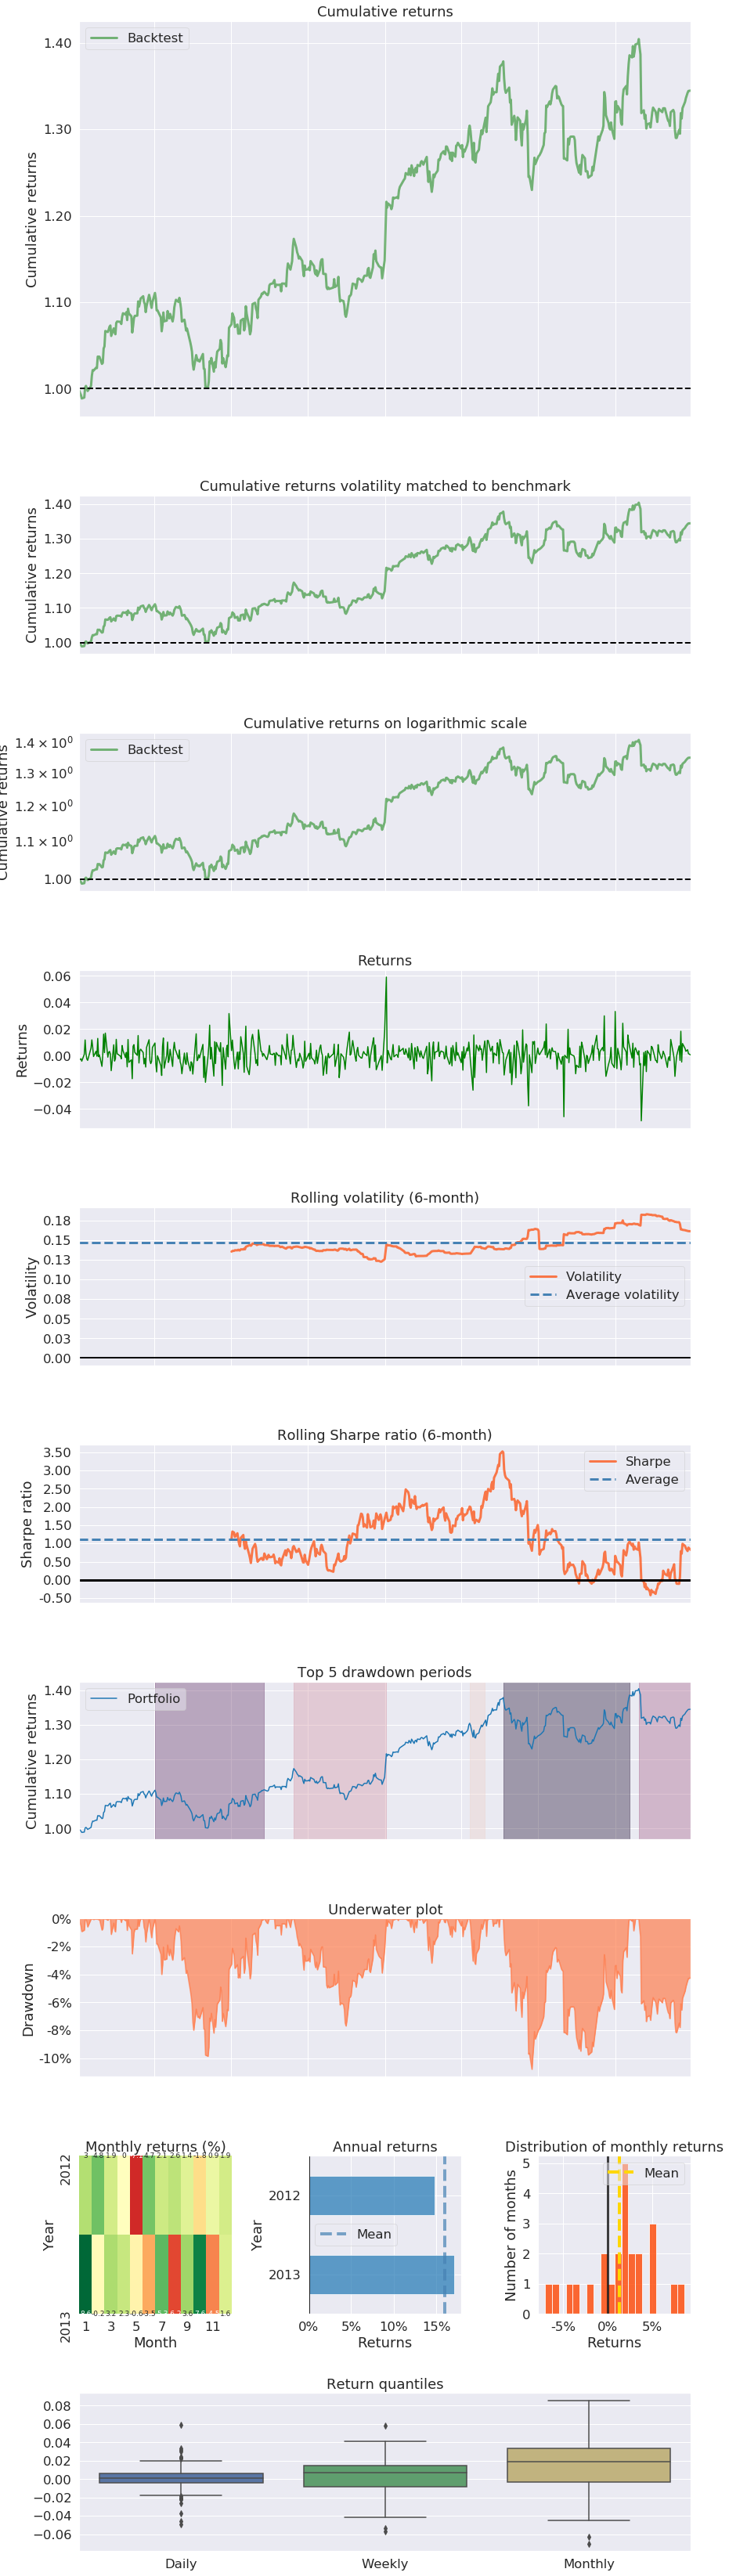

In [5]:
pf.create_returns_tear_sheet(returns =  bt.balance['% change'].dropna())